In [3]:
# Import all the packages required in the script

%matplotlib widget
import mne
import numpy as np
import pandas as pd
from pathlib import Path

In [ ]:
sub='morphping_202304071'
datafilepath = Path.cwd().parent / "data" / f'{sub}.bdf'

# 1.load the data
raw = mne.io.read_raw_bdf(datafilepath,preload=True)

# 2 inspect data
# raw.plot(duration=5, n_channels=72)

# 3 add channel locations
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
# biosemi_montage.plot(show_names=True)
raw.set_montage(biosemi_montage, on_missing='warn')

# plot to check sensor
# raw.plot_sensor()

In [ ]:
# 4 re-reference and plot
ref_channels = ['EXG1','EXG5'] # left and right
raw_ref,_ = mne.set_eeg_reference(raw, ref_channels)
raw_ref.plot(duration=5, n_channels=72)

In [8]:
# 5 downsample to 500 hz
raw_ref_ds = raw_ref.copy().resample(500)

Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)


Removing orphaned offset at the beginning of the file.
Removing orphaned offset at the beginning of the file.


4800 events found on stim channel Status
4800 events found on stim channel Status


Event IDs: [  1   2   4   5   6   7   8   9  10 137 200 201 208]
Event IDs: [  1   2   4   5   6   7   8   9  10 137 200 201 208]


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)


Removing orphaned offset at the beginning of the file.
Removing orphaned offset at the beginning of the file.


4800 events found on stim channel Status
4800 events found on stim channel Status


Event IDs: [  1   2   4   5   6   7   8   9  10 137 200 201 208]
Event IDs: [  1   2   4   5   6   7   8   9  10 137 200 201 208]


In [9]:
# 6 get events after downsampling
events = mne.find_events(raw_ref_ds)
## if you wanna correct event labels
# events[events[:, 2] == 129, 2] = 1

Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)


Removing orphaned offset at the beginning of the file.
Removing orphaned offset at the beginning of the file.


4800 events found on stim channel Status
4800 events found on stim channel Status


Event IDs: [  1   2   4   5   6   7   8   9  10 137 200 201 208]
Event IDs: [  1   2   4   5   6   7   8   9  10 137 200 201 208]


In [10]:
# 6 bandpass filter [0.1,40] except for EXTRA channels
l_freq = 0.1
h_freq = 40
eeg_chan_num =64
pick_ch =np.arange(0,eeg_chan_num,dtype = int).tolist()
raw_ref_ds_fil = raw_ref_ds.copy().filter( l_freq=l_freq,h_freq = h_freq,picks = pick_ch)
#raw_ref_ds_fil.plot(duration=5, n_channels=72)

# plot to check the filtered data
# raw.plot_psd(area_mode='range', tmax=10.0,picks = np.arange(0,eeg_chan_num,dtype = int).tolist(), average=False)
# raw_ref_ds_fil.plot_psd(area_mode='range', tmax=10.0,picks = np.arange(0,eeg_chan_num,dtype = int).tolist(), average=False)

Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.


Filtering raw data in 1 contiguous segment
Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.1 - 40 Hz
Setting up band-pass filter from 0.1 - 40 Hz


FIR filter parameters
FIR filter parameters


---------------------
---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:
Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method
- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.10
- Lower passband edge: 0.10


- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)


- Upper passband edge: 40.00 Hz
- Upper passband edge: 40.00 Hz


- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)


- Filter length: 16501 samples (33.002 s)
- Filter length: 16501 samples (33.002 s)


In [13]:
# 7 epoch
# create event code dictionary bins
event_dict = {'fix': 1,'encoding':2,'cue1':4,
                'nodist':5,'dist':6,'cue2':7,'nodist_impulse':8,'dist_impulse':9,
                'probe':10}
timings = {
            'encoding':0.25,
            'delay1':0.5,
            'cue1':0.5,
            'delay2':0.5,
            'dist':1,
            'delay3':0.5,
            'cue2':0.5,
            'delay4':1,
            'impulse':0.1,
            'delay5':0.5,
            'probe':1
        }

# visualize events
#fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw_ref_ds_fil.info['sfreq'],first_samp=raw_ref_ds_fil.first_samp)

## epoch
epoch_dict = {'encoding': 2}
int_time = [-0.3,6.35]
#epochs = mne.Epochs(raw_ref, events, event_id=event_dict, tmin=-0.2, tmax=0.5,reject=reject_criteria, preload=True)
epochs = mne.Epochs(raw_ref_ds_fil, events,event_id=epoch_dict, tmin=int_time[0], tmax=int_time[1], preload=True, baseline= None)
# epochs.save(datapath + '/' + i + '/' + i + '-_beforedrop_epo.fif',overwrite='True')

Not setting metadata
Not setting metadata


600 matching events found
600 matching events found


No baseline correction applied
No baseline correction applied


0 projection items activated
0 projection items activated


Using data from preloaded Raw for 600 events and 3326 original time points ...
Using data from preloaded Raw for 600 events and 3326 original time points ...


0 bad epochs dropped
0 bad epochs dropped


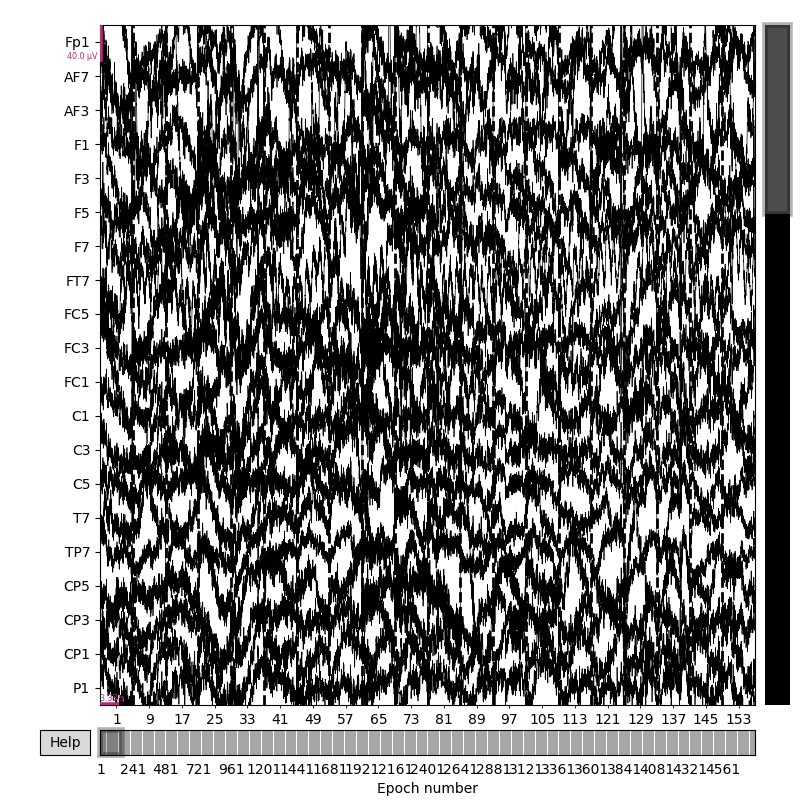

In [17]:
# 8. manually drop epochs and indexs for undropped epochs
epochs_afterdrop = epochs.copy()
epochs_afterdrop.plot()
saveidx = np.where(np.isin(epochs.selection, epochs_afterdrop.selection))[0]
#save
# epochs_afterdrop.save(datapath+'/'+i+'/'+i+'_afterdrop-epo.fif',overwrite='True')
# sub_info = {
#         "sub": i,
#         "epochs": epochs_afterdrop,
#         "trial2save": saveidx,
#     }
# import pickle
# with open(subpath +'/'+i+".pickle", 'wb') as handle:
#         pickle.dump(sub_info, handle, protocol=pickle.HIGHEST_PROTOCOL)